**Lending Club Loan Data Analysis**

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.



---



Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

**credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

**purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

**int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

**installment:** The monthly installments owed by the borrower if the loan is funded.

**log.annual.inc:** The natural log of the self-reported annual income of the borrower.

**dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).

**fico:** The FICO credit score of the borrower.

**days.with.cr.line:** The number of days the borrower has had a credit line.

**revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

**revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

**inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

**delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

**pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

**Tasks:**

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load dataset
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
#data Analysis 
df.value_counts()

credit.policy  purpose             int.rate  installment  log.annual.inc  dti    fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid
0              all_other           0.0712    30.94        10.819778       1.10   772   5910.000000        0          0.8         3               0            0        0                 1
1              debt_consolidation  0.1253    284.47       10.668955       9.27   687   2850.000000        3294       18.7        3               1            0        1                 1
                                                          11.018564       16.11  697   2459.958333        9836       69.8        1               0            0        0                 1
                                                          11.147397       22.05  692   7020.000000        33321      83.5        1               0            0        0                 1
                                             301.20       10.596635   

In [ ]:
# check for nulls
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
# There are no NULLS. 
# Output column is not.fully.paid. 
#1.     Feature Transformation

#Transform categorical values into numerical values (discrete)

**check** not.fully.paid column's **distribution** bold text

<Axes: xlabel='not.fully.paid', ylabel='count'>

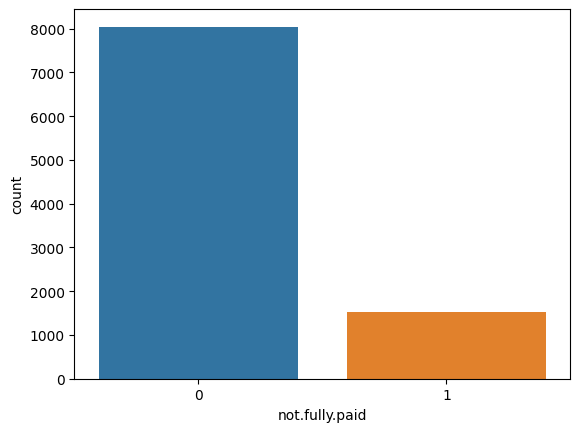

In [ ]:
sns.countplot(x='not.fully.paid', data=df)

In [ ]:
# check the numbers 
df.groupby('not.fully.paid')['not.fully.paid'].count()

not.fully.paid
0    8045
1    1533
Name: not.fully.paid, dtype: int64

This has very imbalanced Data. So lets use Over Sampling method.


In [ ]:
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

In [ ]:
df_1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
57,1,credit_card,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1
65,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1
73,1,small_business,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())


Random over-sampling:
0    8045
1    8045
Name: not.fully.paid, dtype: int64


<Axes: xlabel='not.fully.paid', ylabel='count'>

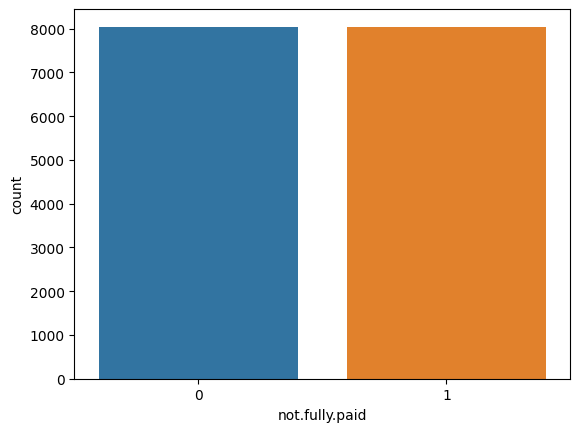

In [ ]:
sns.countplot(x='not.fully.paid', data=df_test_over)

In [ ]:
## Exploratory data analysis of different factors of the dataset.

Text(0.5, 0, 'FICO')

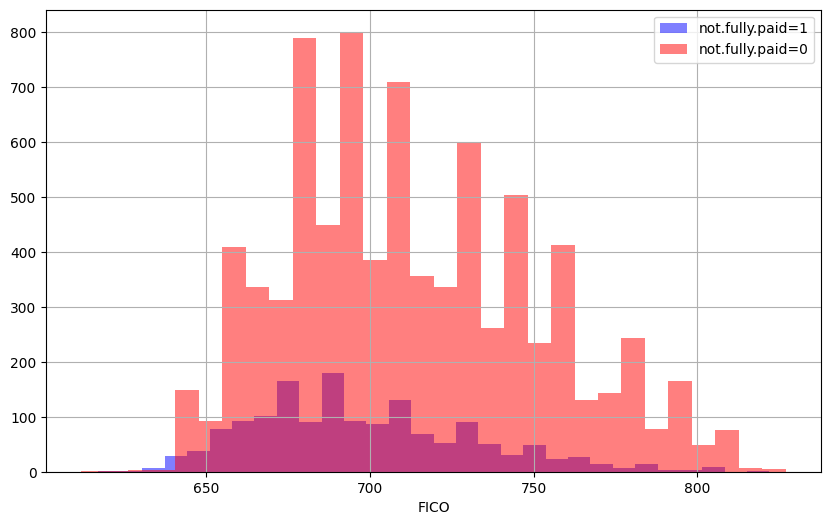

In [ ]:
# Analysis between FICO and output column
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

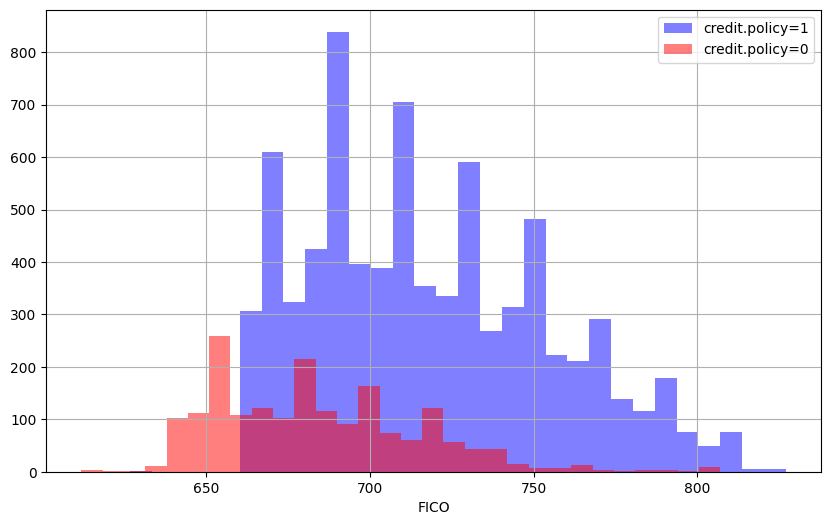

In [ ]:
# Analysis between credit.policy and output column
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='credit.policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='credit.policy=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

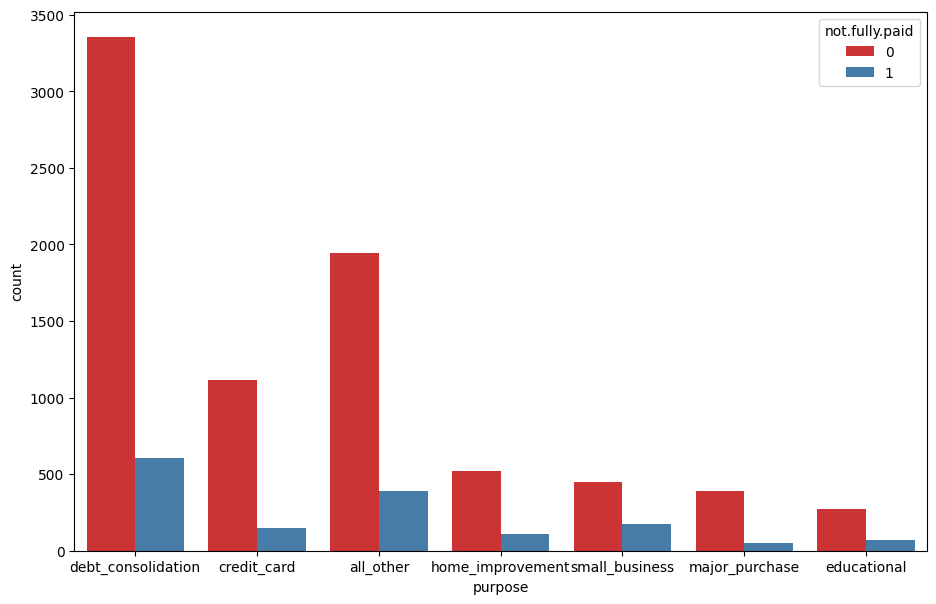

In [ ]:
# DataSet group by loan purpose
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

<Axes: >

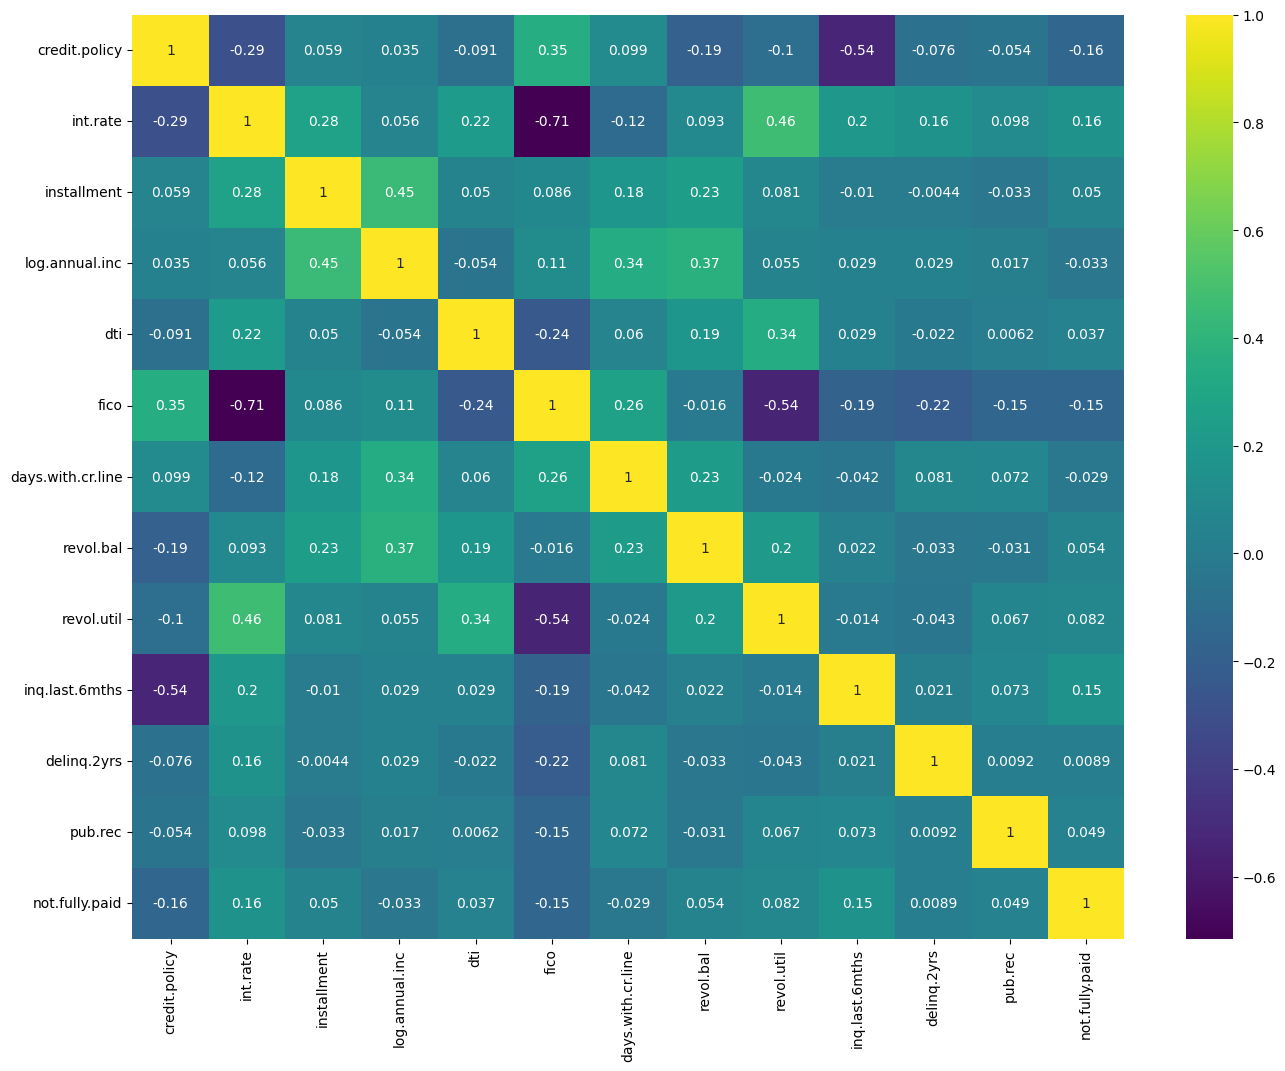

In [ ]:
# Use the Correlation mAtrix to see the relation between features 
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=df.corr(), 
        cmap='viridis', 
        annot=True
        , 
        fmt='.2g'
)

In [ ]:
col_fea = ['purpose']
final_data = pd.get_dummies(df_test_over,columns=col_fea,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 7870
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

<Axes: >

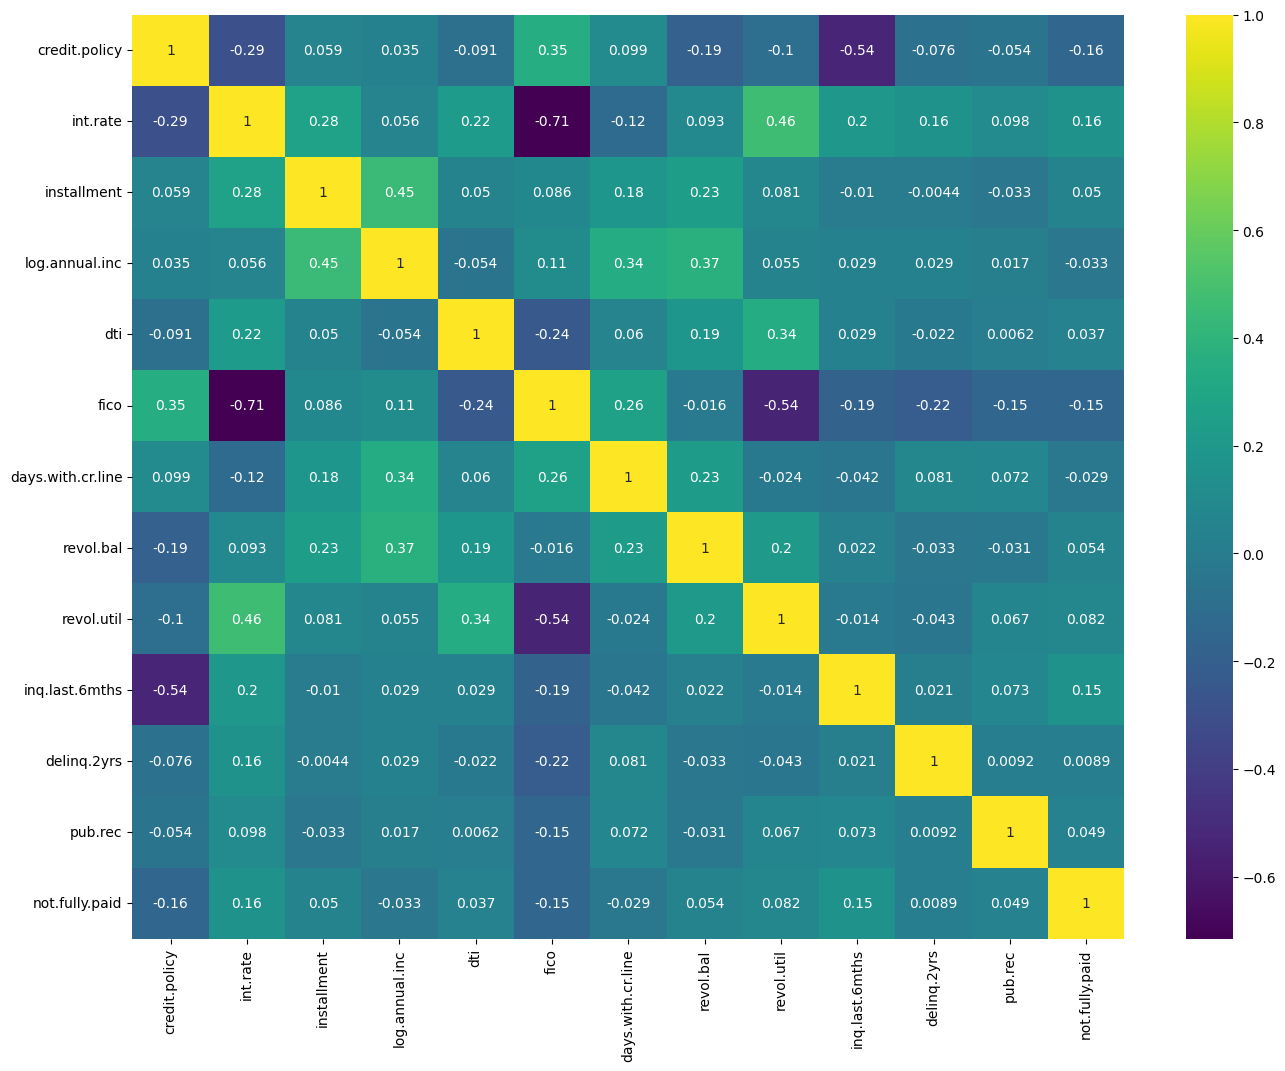

In [ ]:
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=df.corr(), 
        cmap='viridis', 
        annot=True
        , 
        fmt='.2g'
)

In [ ]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [ ]:
final_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,1.609000e+04,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000
mean,0.749161,0.126720,329.545237,10.914206,12.786991,705.712554,4495.257494,1.871645e+04,48.942782,1.892728,0.169422,0.073897,0.500000,0.117278,0.405904,0.039901,0.067557,0.041703,0.084649
std,0.433510,0.026814,214.932639,0.641170,6.902868,36.937469,2471.730196,4.365037e+04,29.310341,2.568241,0.535991,0.275497,0.500016,0.321761,0.491081,0.195732,0.250993,0.199916,0.278367
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.110300,167.060000,10.518673,7.400000,677.000000,2789.958333,3.153500e+03,24.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.126100,275.810000,10.915088,12.860000,702.000000,4080.000000,8.641000e+03,49.300000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.144200,464.170000,11.289782,18.140000,732.000000,5691.041667,1.893150e+04,73.700000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Based on the description of the columns and the correlation matrix we can see drop the following columns 


In [ ]:
final_data.drop('revol.bal', axis=1)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,1,0.1531,313.34,10.691945,6.14,662,6960.000000,77.0,1,0,0,1,0,1,0,0,0,0
6897,1,0.1843,363.70,11.289782,0.08,667,3540.041667,11.1,3,0,1,1,0,0,0,0,0,0
6838,1,0.1461,206.86,10.968198,12.95,667,11070.041670,47.9,3,0,0,1,0,1,0,0,0,0
845,1,0.1324,446.29,11.225243,21.06,682,5159.958333,71.9,1,0,1,1,1,0,0,0,0,0


In [ ]:
final_data.drop('days.with.cr.line', axis=1)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,1,0.1531,313.34,10.691945,6.14,662,5776,77.0,1,0,0,1,0,1,0,0,0,0
6897,1,0.1843,363.70,11.289782,0.08,667,167,11.1,3,0,1,1,0,0,0,0,0,0
6838,1,0.1461,206.86,10.968198,12.95,667,8763,47.9,3,0,0,1,0,1,0,0,0,0
845,1,0.1324,446.29,11.225243,21.06,682,13438,71.9,1,0,1,1,1,0,0,0,0,0


In [ ]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [ ]:
#MODEL CREATION
# Since it is a binary classification problem we can use ANN(artifical Neural Network)

to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]
final_data.size


305710

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential()

model.add(
        Dense(19, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

<Axes: >

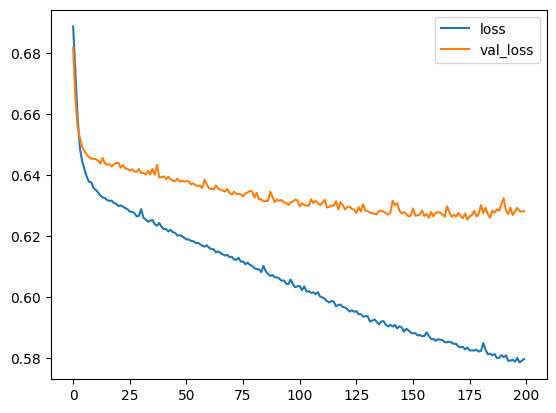

In [ ]:
## Model EValuation and Validation
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

print(
        confusion_matrix(y_test,classes_x), 
        '\n', 
        classification_report(y_test,classes_x)
)

151/151 [==============================] - 0s 2ms/step
[[2437    0]
 [2390    0]] 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      2437
           1       0.00      0.00      0.00      2390

    accuracy                           0.50      4827
   macro avg       0.25      0.50      0.34      4827
weighted avg       0.25      0.50      0.34      4827



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## REFINE MODEL
model_new = Sequential()

model_new.add(
        Dense(19, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

<Axes: >

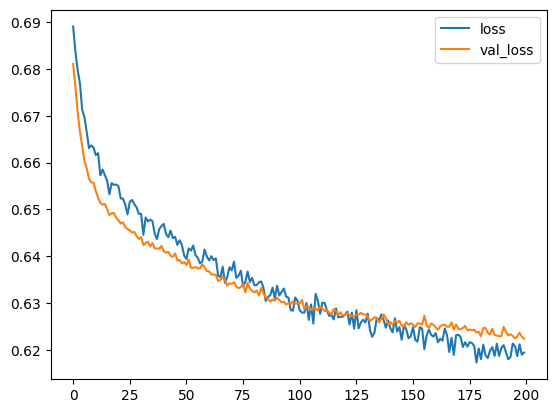

In [ ]:

pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

In [ ]:
##SAVE THE MODEL 
from pickle import dump, load

dump(scaler, open('model_scaler.pkl', 'wb'))
model_new.save('model_lending_club.h5')